## DATA DIRI
<ul>
 <li>Nama lengkap : alidin</li>
 <li>Username     : alidin202</li>
 <li>Email        : alidin202@gmail.com</li>
</ul>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
import numpy as np

In [ ]:
!pip install split_folders

In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-02-15 00:31:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.24MB/s    in 65s     

2021-02-15 00:32:47 (4.74 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# extraksi file
fileZip = "rockpaperscissors.zip"
extracZip = zipfile.ZipFile(fileZip, 'r')
extracZip.extractall("datasets")

In [ ]:
extracZip.close()

## PEMISAHAN DATASET

In [ ]:
os.listdir("/content/datasets")

['rockpaperscissors', '__MACOSX']

In [ ]:
!rm -r "/content/datasets/rockpaperscissors/rps-cv-images"
!rm "/content/datasets/rockpaperscissors/README_rpc-cv-images.txt"

In [ ]:
#split folder
import splitfolders
input =  "/content/datasets/rockpaperscissors"
output = "/content/datasets/rockpaperscissors_splited"
splitfolders.ratio(input=input, output=output, seed=422, ratio=(0.6,0.4))

Copying files: 2188 files [00:00, 3984.47 files/s]


## train dan validation dir

In [ ]:
mainFolder = "/content/datasets/rockpaperscissors_splited"
trainDir = os.path.join(mainFolder,"train")
paperTrain = os.path.join(trainDir,"paper")
rockTrain = os.path.join(trainDir,"rock")
scissorsTrain = os.path.join(trainDir,"scissors")

valDir = os.path.join(mainFolder,"val")
paperVal = os.path.join(valDir,"paper")
rockVal = os.path.join(valDir,"rock")
scissorsVal = os.path.join(valDir,"scissors")

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = datagen.flow_from_directory(
        trainDir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        valDir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical',
        shuffle = False)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 512)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=25,
      validation_data=validation_generator,
      validation_steps=5, 
      verbose=2)

Epoch 1/25
25/25 - 25s - loss: 1.2384 - accuracy: 0.3125 - val_loss: 0.9734 - val_accuracy: 0.8625
Epoch 2/25
25/25 - 24s - loss: 1.1130 - accuracy: 0.5075 - val_loss: 1.3070 - val_accuracy: 0.2875
Epoch 3/25
25/25 - 24s - loss: 0.7920 - accuracy: 0.7325 - val_loss: 0.9166 - val_accuracy: 0.6250
Epoch 4/25
25/25 - 24s - loss: 0.5225 - accuracy: 0.8175 - val_loss: 0.4223 - val_accuracy: 0.8750
Epoch 5/25
25/25 - 23s - loss: 0.3425 - accuracy: 0.8775 - val_loss: 0.1612 - val_accuracy: 0.9250
Epoch 6/25
25/25 - 23s - loss: 0.3236 - accuracy: 0.8850 - val_loss: 0.2157 - val_accuracy: 0.9375
Epoch 7/25
25/25 - 23s - loss: 0.3152 - accuracy: 0.9000 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 8/25
25/25 - 23s - loss: 0.2957 - accuracy: 0.8925 - val_loss: 0.2500 - val_accuracy: 0.9250
Epoch 9/25
25/25 - 23s - loss: 0.2092 - accuracy: 0.9450 - val_loss: 0.2698 - val_accuracy: 0.9000
Epoch 10/25
25/25 - 23s - loss: 0.1874 - accuracy: 0.9450 - val_loss: 0.1551 - val_accuracy: 0.9250
Epoch 11/

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
yTrue = validation_generator.classes
yPred = np.argmax(model.predict(validation_generator),axis = 1)
confusion_matrix(yTrue,yPred)

array([[280,   5,   0],
       [  6, 285,   0],
       [  5,   1, 294]])

In [ ]:
classification_report(yTrue,yPred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97       285\n           1       0.98      0.98      0.98       291\n           2       1.00      0.98      0.99       300\n\n    accuracy                           0.98       876\n   macro avg       0.98      0.98      0.98       876\nweighted avg       0.98      0.98      0.98       876\n'

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       285
           1       0.98      0.98      0.98       291
           2       1.00      0.98      0.99       300

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876


Saving rock.jpeg to rock (1).jpeg


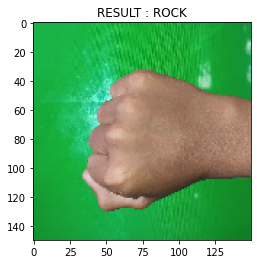

In [80]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  res = ""
  # print(classes[0])
  if classes[0][0]:
    res = 'RESULT : PAPER'
  elif classes[0][1]:
    res = 'RESULT : ROCK'
  else:
    res = 'RESULT : SCISSORS'
    
  plt.imshow(img)
  plt.title(res)

/bin/bash: listdir: command not found


In [81]:
files = os.listdir("/content")
for f in files:
  if(f .endswith(".jpeg")):
    os.remove(f)